In [15]:
import pandas as pd
import sys
sys.path.append("..")
from src.database import execute_query, Facture, Achat, Produit, Client, Log, engine
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, Column, String, Date, Numeric, DateTime, ForeignKey, func, cast, Integer
from sqlalchemy.orm import declarative_base, sessionmaker
from dotenv import load_dotenv
import os
import pandas as pd
from sqlalchemy import text
SessionLocal = sessionmaker(autocommit=False, autoflush=False, bind=engine)
from datetime import datetime
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Explorations des données

In [16]:
execute_query("SELECT COUNT(*) FROM melody.client")

,count
0,929


In [17]:
execute_query("SELECT COUNT(*) FROM melody.achat")

,count
0,15138


In [18]:
execute_query("SELECT COUNT(*) FROM melody.facture")

,count
0,5097


In [19]:
execute_query("SELECT COUNT(*) FROM melody.produit")

,count
0,2005


In [20]:
execute_query("SELECT * FROM melody.produit")

,id_produit,nom,prix
0,PROD_edge_so_crime,edge so crime share.,12.18
1,PROD_thank_do_article,thank do article especially.,67.86
2,PROD_include_dinner_main,include dinner main friend.,287.99
3,PROD_capital_hear_morning,capital hear morning people.,55.43
4,PROD_between_everybody_size,between everybody size conference.,45.70
...,...,...,...
2000,PROD_yourself_network_product,yourself network product sister.,43.08
2001,PROD_chair_after_standard,chair after standard see.,4.23
2002,PROD_other_season_whose,other season whose who.,58.50
2003,PROD_maitter_certainly_factor,maitter certainly factor also.,0.10


In [21]:
execute_query("SELECT * FROM melody.client")

,id_client,nom,mail,adresse,birthdate,genre
0,CLT_Carol_Potter,Carol Potter,ashley38@example.org,"405 Adrian Crest Suite 095 Jamesstad, MM 36094",2000-02-16,F
1,CLT_Samuel_Coleman,Samuel Coleman,qmeyer@example.com,"64623 Wright Mills Turnermouth, K5 45555",1999-11-03,F
2,CLT_Richard_Dunn,Richard Dunn,phughes@exampie.com,3305 Maureen Manors West Daniel NY 27137,1989-04-24,M
3,CLT_Mario_Stout,Mario Stout,danielledaniels@example.org,"48010 Margaret Passage Suite 093 Walshshire, I...",1999-03-26,F
4,CLT_Rachel_Ramirez,Rachel Ramirez,patriciakelley@exampile.org,"7896 Jones Underpass Kennethborough, CT 89365",1989-05-20,M
...,...,...,...,...,...,...
924,CLT_Bradley_Ramsey,Bradley Ramsey,kimberly32@example.org,"PSC 3042, Box 2314 APO AA 35572",1989-11-17,M
925,CLT_Megan_Blanchard,Megan Blanchard,janetpena@example.net,"847 Doris Manors West Marissamouth, OK 20416",1989-10-22,F
926,CLT_Briana_Ortiz,Briana Ortiz,deannajohnson@example.com,"96831 Ford Brook Apt. 303 Port Robinstad, KY ...",1989-05-15,M
927,CLT_Test_Client,Test Client,test@example.com,123 Test St,1990-01-01,M


In [22]:
execute_query("SELECT * FROM melody.facture")

,id_facture,texte,date_facturation,total
0,2018-0001,Edge so crime share.\n\nThank do article espec...,2018-10-13 03:27:00,1146.84
1,2018-0002,Between everybody size conference.\nTOTAL 4 x ...,2018-10-17 13:37:00,182.8
2,2018-0003,Item model true sell.\n\nGuess want sound site...,2018-11-03 23:58:00,152.98
3,2018-0004,War commercial dream even.\nThing speech fire ...,2018-11-14 18:10:00,292.16
4,2018-0005,Visit money record ability.\nTOTAL 1 x 74.84 E...,2018-11-17 18:13:00,74.84
...,...,...,...,...
5092,2024-0840,Bring which air short.\n\nPainting admit how m...,2024-12-30 11:06:00,193.78
5093,2024-0841,Foot develop with since.\nTOTAL 4 x 27.27 Euro...,2024-12-31 11:57:00,109.08
5094,2024-0842,Up something clearly everybody.\nCentury quali...,2024-12-31 16:01:00,1104.84
5095,2024-0843,Air million able memory.\nTOTAL 1 x 333.65 Eur...,2024-12-31 17:42:00,333.65


In [23]:
execute_query("SELECT * FROM melody.achat")

,id_produit,id_client,id_facture,quantité
0,PROD_edge_so_crime,CLT_Carol_Potter,2018-0001,4.00
1,PROD_thank_do_article,CLT_Carol_Potter,2018-0001,1.00
2,PROD_include_dinner_main,CLT_Carol_Potter,2018-0001,3.00
3,PROD_capital_hear_morning,CLT_Carol_Potter,2018-0001,3.00
4,PROD_between_everybody_size,CLT_Samuel_Coleman,2018-0002,4.00
...,...,...,...,...
15133,PROD_up_something_clearly,CLT_Laura_Macdonald,2024-0842,4.00
15134,PROD_century_quality_drive,CLT_Laura_Macdonald,2024-0842,1.00
15135,PROD_apply_learn_bank,CLT_Laura_Macdonald,2024-0842,2.00
15136,PROD_international_product_some,CLT_Laura_Macdonald,2024-0842,4.00


# Récupération des données pour la segmentation rfm

## Récupération montant

In [24]:
execute_query("""select a.id_client, sum(f.total)
from melody.facture f 
join melody.achat a 
on f.id_facture = a.id_facture 
join melody.client c 
on a.id_client = c.id_client 
group by f.id_facture , a.id_client ;""")

,id_client,sum
0,CLT_Ashley_Davis,220.96
1,CLT_Mrs._Erin_Ramos,955.65
2,CLT_Linda_Hernandez,4100.70
3,CLT_Jesse_Barnett,890.20
4,CLT_Johnny_Huffman,4687.95
...,...,...
5091,CLT_Vanessa_Davis,89.58
5092,CLT_Victoria_Clayton,4003.00
5093,CLT_Alexander_Haney,106.72
5094,CLT_Deborah_Phillips,8080.52


In [25]:
with SessionLocal() as session:
    query = (
        session.query(
            Client.id_client,
            func.sum(Facture.total).label('total_depense')
        )
        .join(Achat, Achat.id_facture == Facture.id_facture)
        .join(Client, Client.id_client == Achat.id_client)
        .group_by(Facture.id_facture, Client.id_client)
    )
    result = query.all()
    df_montant = pd.DataFrame(result, columns=['id_client', 'total_depense'])
df_montant['total_depense'] = pd.to_numeric(df_montant['total_depense'], errors='coerce')
df_montant['score_depense'] = pd.qcut(
    df_montant['total_depense'].dropna(), 
    q=5, 
    labels=[5, 4, 3, 2, 1]
)
df_montant
    


,id_client,total_depense,score_depense
0,CLT_Ashley_Davis,220.96,4
1,CLT_Mrs._Erin_Ramos,955.65,3
2,CLT_Linda_Hernandez,4100.70,2
3,CLT_Jesse_Barnett,890.20,3
4,CLT_Johnny_Huffman,4687.95,1
...,...,...,...
5091,CLT_Vanessa_Davis,89.58,5
5092,CLT_Victoria_Clayton,4003.00,2
5093,CLT_Alexander_Haney,106.72,5
5094,CLT_Deborah_Phillips,8080.52,1


## Récupération fréquence

In [29]:
with SessionLocal() as session:
    query = (
        session.query(
            Client.id_client,
            func.count(Achat.id_facture.distinct())
        )
        .join(Client, Client.id_client == Achat.id_client)
        .group_by(Client.id_client)
    )
    result = query.all()
    df_frequence = pd.DataFrame(result, columns=['id_client', 'nombre_de_commande'])
bins = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels = [1, 2, 3, 4, 5]
df_frequence['score_frequence'] = pd.cut(df_frequence['nombre_de_commande'].rank(method='min', pct=True), 
                                           bins=bins, 
                                           labels=labels, 
                                           include_lowest=True, 
                                           right=False)
df_frequence['score_frequence'] = df_frequence['score_frequence'].astype(int, errors='ignore')
df_frequence.sort_values("nombre_de_commande")

,id_client,nombre_de_commande,score_frequence
100,CLT_Breanna_Diaz,1,1
803,CLT_Sarah_Burgess_MD,1,1
802,CLT_Sara_Clayton,1,1
801,CLT_Sara_Arnold,1,1
569,CLT_Margaret_Khan,1,1
...,...,...,...
369,CLT_Jacqueline_Wallace,16,5
197,CLT_Craig_Manning,17,5
865,CLT_Teresa_Cox,17,5
424,CLT_Joel_Robinson,17,5


## Récupération récence

In [30]:
with SessionLocal() as session:
    now = datetime.now().date()
    query = (
        session.query(
            Achat.id_client,
            cast(func.date_part('day', now - func.max(Facture.date_facturation)), Integer).label("jours_depuis_derniere_facture")
        )
        .join(Facture, Facture.id_facture == Achat.id_facture)
        .join(Client, Client.id_client == Achat.id_client)
        .group_by(Achat.id_client)
    )
    result = query.all()
    df_recence = pd.DataFrame(result, columns=['id_client', 'jours_depuis_derniere_facture'])
df_recence['score_recence'] = pd.qcut(
    df_recence['jours_depuis_derniere_facture'], 
    q=5, 
    labels=[5, 4, 3, 2, 1]
)
df_recence.sort_values("score_recence")



,id_client,jours_depuis_derniere_facture,score_recence
0,CLT_Corey_Kelley,145,5
409,CLT_Rebecca_Schmidt,113,5
133,CLT_Suzanne_Gray,81,5
134,CLT_Jacob_Smith,82,5
135,CLT_Taylor_Rangel,137,5
...,...,...,...
628,CLT_Mario_Mitchell,1019,1
146,CLT_Lisa_Williams,2188,1
620,CLT_Tammy_Solis,2295,1
332,CLT_Michelle_Clark,2174,1


# Segmentation RFM

In [31]:
df = df_montant.merge(df_frequence, how="outer")
df = df.merge(df_recence, how="outer")
df

,id_client,total_depense,score_depense,nombre_de_commande,score_frequence,jours_depuis_derniere_facture,score_recence
0,CLT_Ashley_Davis,220.96,4,13,5,184,4
1,CLT_Ashley_Davis,2370.36,2,13,5,184,4
2,CLT_Ashley_Davis,143.12,5,13,5,184,4
3,CLT_Ashley_Davis,268.24,4,13,5,184,4
4,CLT_Ashley_Davis,4434.33,1,13,5,184,4
...,...,...,...,...,...,...,...
5091,CLT_Sydney_Roberts,316.20,4,1,1,1164,1
5092,CLT_Raymond_Waters,6085.76,1,1,1,2084,1
5093,CLT_Kevin_Smith,1231.26,3,1,1,1327,1
5094,CLT_Leslie_Krause,6404.85,1,1,1,343,3


In [32]:
def segment_customer(row):
    recency = row['score_recence']
    frequency_monetary = row['score_frequence'] * row["score_depense"]

    if recency <= 2:
        if frequency_monetary >= 4:
            return "Cannot Lose Them"
        elif frequency_monetary <= 2:
            return "Lost"
        else:
            return "At Risk"
    elif recency >= 4:
        if frequency_monetary >= 4:
            return "Champions"
        elif frequency_monetary == 1:
            return "New"
        else:
            return "Loyal"
    else:  # recency = 3
        if frequency_monetary >= 4:
            return "Loyal"
        elif frequency_monetary == 3:
            return "Need Attention"
        elif frequency_monetary == 2:
            return "About to Sleep"
        else:
            return "Promising"

df['segment'] = df.apply(segment_customer, axis=1)
df


,id_client,total_depense,score_depense,nombre_de_commande,score_frequence,jours_depuis_derniere_facture,score_recence,segment
0,CLT_Ashley_Davis,220.96,4,13,5,184,4,Champions
1,CLT_Ashley_Davis,2370.36,2,13,5,184,4,Champions
2,CLT_Ashley_Davis,143.12,5,13,5,184,4,Champions
3,CLT_Ashley_Davis,268.24,4,13,5,184,4,Champions
4,CLT_Ashley_Davis,4434.33,1,13,5,184,4,Champions
...,...,...,...,...,...,...,...,...
5091,CLT_Sydney_Roberts,316.20,4,1,1,1164,1,Cannot Lose Them
5092,CLT_Raymond_Waters,6085.76,1,1,1,2084,1,Lost
5093,CLT_Kevin_Smith,1231.26,3,1,1,1327,1,At Risk
5094,CLT_Leslie_Krause,6404.85,1,1,1,343,3,Promising


In [33]:

segment_colors = {
    "About to sleep": "lightcoral",
    "At risk": "coral",
    "Cannot Lose them": "firebrick",
    "Champions": "gold",
    "Lost": "darkgray",
    "Loyal": "forestgreen",
    "Need attention": "sandybrown",
    "New": "lightgreen",
    "Potential Loyalists": "mediumseagreen",
    "Promising": "skyblue"
}
df['segment_code'] = df['segment'].map({segment: i for i, segment in enumerate(segment_colors)})
colorscale = [(i / len(segment_colors), color) for i, color in enumerate(segment_colors.values())]

fig = go.Figure(data=[go.Scatter3d(
    x=df['total_depense'],
    y=df['nombre_de_commande'],
    z=df['jours_depuis_derniere_facture'],
    mode='markers',
    marker=dict(
        size=5,
        color=df['segment_code'],
        colorscale=colorscale,
        opacity=0.8,
        colorbar=dict(
            title="Segment",
            tickvals=list(range(len(segment_colors))),
            ticktext=list(segment_colors.keys())
        )
    )
)])

fig.update_layout(
    scene = dict(
        xaxis_title='total_depense',
        yaxis_title='nombre_de_commande',
        zaxis_title='jours_depuis_derniere_facture'
    ),
    title='Répartition des clients selon RFM'
)

fig.show()

In [34]:
df[["id_client", "total_depense", "nombre_de_commande", "jours_depuis_derniere_facture", "segment"]]

,id_client,total_depense,nombre_de_commande,jours_depuis_derniere_facture,segment
0,CLT_Ashley_Davis,220.96,13,184,Champions
1,CLT_Ashley_Davis,2370.36,13,184,Champions
2,CLT_Ashley_Davis,143.12,13,184,Champions
3,CLT_Ashley_Davis,268.24,13,184,Champions
4,CLT_Ashley_Davis,4434.33,13,184,Champions
...,...,...,...,...,...
5091,CLT_Sydney_Roberts,316.20,1,1164,Cannot Lose Them
5092,CLT_Raymond_Waters,6085.76,1,2084,Lost
5093,CLT_Kevin_Smith,1231.26,1,1327,At Risk
5094,CLT_Leslie_Krause,6404.85,1,343,Promising


In [35]:
df["segment"].value_counts()

segment
Champions           2530
Loyal               1265
Cannot Lose Them     920
Lost                 141
At Risk              139
Need Attention        59
About to Sleep        22
New                   14
Promising              6
Name: count, dtype: int64

# Clustering

## On ajoute l'âge des clients

In [36]:
with SessionLocal() as session:
    query = (
        session.query(
            Client.id_client,
            Client.birthdate
        )
    )
    result = query.all()
    df_age = pd.DataFrame(result, columns=['id_client', 'birthdate'])

now = datetime.now()
df_age['age'] = df_age['birthdate'].apply(lambda x: now.year - x.year - ((now.month, now.day) < (x.month, x.day)))

df_age = df_age.drop('birthdate', axis=1)

df_age

,id_client,age
0,CLT_Carol_Potter,25
1,CLT_Samuel_Coleman,25
2,CLT_Richard_Dunn,35
3,CLT_Mario_Stout,25
4,CLT_Rachel_Ramirez,35
...,...,...
922,CLT_Vanessa_Johnston,25
923,CLT_Monique_Williams,35
924,CLT_Bradley_Ramsey,35
925,CLT_Megan_Blanchard,35


## On applique le k mean

In [37]:
df = df.merge(df_age, how="left")
df

,id_client,total_depense,score_depense,nombre_de_commande,score_frequence,jours_depuis_derniere_facture,score_recence,segment,segment_code,age
0,CLT_Ashley_Davis,220.96,4,13,5,184,4,Champions,3.0,40
1,CLT_Ashley_Davis,2370.36,2,13,5,184,4,Champions,3.0,40
2,CLT_Ashley_Davis,143.12,5,13,5,184,4,Champions,3.0,40
3,CLT_Ashley_Davis,268.24,4,13,5,184,4,Champions,3.0,40
4,CLT_Ashley_Davis,4434.33,1,13,5,184,4,Champions,3.0,40
...,...,...,...,...,...,...,...,...,...,...
5091,CLT_Sydney_Roberts,316.20,4,1,1,1164,1,Cannot Lose Them,NaN,35
5092,CLT_Raymond_Waters,6085.76,1,1,1,2084,1,Lost,4.0,25
5093,CLT_Kevin_Smith,1231.26,3,1,1,1327,1,At Risk,NaN,35
5094,CLT_Leslie_Krause,6404.85,1,1,1,343,3,Promising,9.0,25


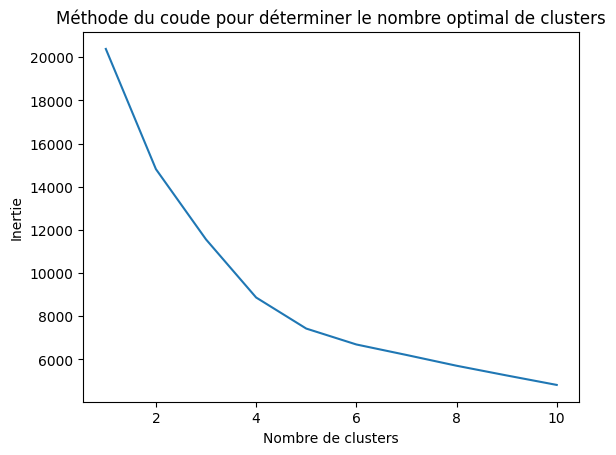

In [38]:

X = df[['total_depense', 'nombre_de_commande', 'jours_depuis_derniere_facture', 'age']]
X = X.dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, 
                    init='k-means++', 
                    max_iter=300, 
                    n_init=10, 
                    random_state=0) 
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('Méthode du coude pour déterminer le nombre optimal de clusters')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.show()


In [39]:

n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, 
                init='k-means++', 
                max_iter=300, 
                n_init=10, 
                random_state=0) 
kmeans.fit(X_scaled)
df['cluster'] = kmeans.labels_
display(df.groupby('cluster').agg({
    'total_depense': 'mean',
    'nombre_de_commande': 'mean',
    'jours_depuis_derniere_facture': 'mean',
    'age': 'mean',
    'id_client': 'count'
}))

,total_depense,nombre_de_commande,jours_depuis_derniere_facture,age,id_client
cluster,,,,,
0,1743.905493,4.431111,397.488000,29.090667,1125
1,1730.434385,9.682123,279.385475,40.049721,1790
2,1922.994794,2.876513,1304.581114,31.464891,413
3,1469.615508,10.293627,261.069044,30.045524,1318
4,11544.326356,8.477778,337.680000,34.180000,450


In [40]:
segment_colors = {
    0: "forestgreen",
    1: "coral",
    2: "firebrick",
    3: "gold",
    4: "skyblue"
}

colors = df['cluster'].map(segment_colors)

fig = go.Figure(data=[go.Scatter3d(
    x=df['total_depense'],
    y=df['nombre_de_commande'],
    z=df['jours_depuis_derniere_facture'],
    mode='markers',
    marker=dict(
        size=5,
        color=colors,
        opacity=0.8
    )
)])

fig.update_layout(
    scene = dict(
        xaxis_title='total_depense',
        yaxis_title='nombre_de_commande',
        zaxis_title='jours_depuis_derniere_facture'
    ),
    title='Clusters RFM'
)

fig.show()